# Description of methodology
# Classification algorithms
# Perceptron
From [Python Machine Learning - Second Edition By Sebastian Raschka, Vahid Mirjalili](https://www.packtpub.com/big-data-and-business-intelligence/python-machine-learning-second-edition)

Trying to understand how the biological brain works, in order to design AI, Warren McCulloch and Walter Pitts published the first concept of a simplified brain cell, the so-called McCulloch-Pitts (MCP) neuron, in 1943 ([A Logical Calculus of the Ideas Immanent in Nervous Activity, W. S. McCulloch and W. Pitts](https://www.cs.cmu.edu/~./epxing/Class/10715/reading/McCulloch.and.Pitts.pdf), Bulletin of Mathematical Biophysics, 5(4): 115-133, 1943). Neurons are interconnected nerve cells in the brain that are involved in the processing and transmitting of chemical and electrical signals, which is illustrated in the following figure:

![neuron](img/neuron.jpg)

McCulloch and Pitts described such a nerve cell as a simple logic gate with binary outputs; multiple signals arrive at the dendrites, are then integrated into the cell body, and, if the accumulated signal exceeds a certain threshold, an output signal is generated that will be passed on by the axon.

Only a few years later, Frank Rosenblatt published the first concept of the perceptron learning rule based on the MCP neuron model ([The Perceptron: A Perceiving and Recognizing Automaton](https://blogs.umass.edu/brain-wars/files/2016/03/rosenblatt-1957.pdf), F. Rosenblatt, Cornell Aeronautical Laboratory, 1957). With his perceptron rule, Rosenblatt proposed an algorithm that would automatically learn the optimal weight coefficients that are then multiplied with the input features in order to make the decision of whether a neuron fires or not. In the context of supervised learning and classification, such an algorithm could then be used to predict if a sample belongs to one class or the other.

## The formal definition of an artificial neuron
More formally, we can put the idea behind artificial neurons into the context of a binary classification task where we refer to our two classes as 1 (positive class) and -1 (negative class) for simplicity. We can then define a decision function ($\phi(z)$) that takes a linear combination of certain input values $x$ and a corresponding weight vector $w$, where $z$ is the so-called net input:

$ \boldsymbol{w} = \begin{bmatrix} w_1 \\ \vdots \\ w_m \end{bmatrix}, \quad $ 
$ \boldsymbol{x} = \begin{bmatrix} x_1 \\ \vdots \\ x_m \end{bmatrix}, \quad $
$ z = w_1 x_1 + \dots + w_m x_m $

Now, if the net input of a particular sample $\boldsymbol{x}^{(i)}$ is greater than a defined threshold $\theta$, we predict class 1, and class -1 otherwise. In the perceptron algorithm, the decision function $\phi(\sign )$ is a variant of a unit step function:

$ \phi(z) =\begin{cases}1&{\text{if }}\ z \geq \theta,\\-1&{\text{otherwise}}\end{cases}$

For simplicity, we can bring the threshold $\theta$ to the left side of the equation and define a weight-zero as $w_0 = - \theta$ and $x_0 = 1$ so that we write $z$ in a more compact form:

$ z = w_0 x_0 + w_1 x_1 + \dots + w_m x_m = \sum_{j=0}^m \boldsymbol{x}_j \boldsymbol{w}_j = \boldsymbol{w}^T \boldsymbol{x} $

In machine learning literature, the negative threshold, or weight, $w_0 = - \theta$, is usually called the bias unit.

The following figure illustrates how the net input $ z = \boldsymbol{w}^T \boldsymbol{x} $ is squashed into a binary output (`-1` or `1`) by the decision function of the perceptron (left subfigure) and how it can be used to discriminate between two linearly separable classes (right subfigure):

<img src='img/perceptron.jpg' alt="perceptron">

## The perceptron learning rule
The whole idea behind the MCP neuron and Rosenblatt's thresholded perceptron model is to use a reductionist approach to mimic how a single neuron in the brain works: it either fires or it doesn't. Thus, Rosenblatt's initial perceptron rule is fairly simple and can be summarized by the following steps:
1. Initialize the weights to 0 or small random numbers.
2. For each training sample:   
    a. Compute the output value.  
    b. Update the weights.

Here, the output value is the class label predicted by the unit step function that we defined earlier, and the simultaneous update of each weight $w_j$ in the weight vector $\boldsymbol{w}$ can be more formally written as:

$ w_j := w_j + \Delta w_j $

The value of $\Delta w_j$, which is used to update the weight $w_j$, is calculated by the perceptron learning rule:

$ \Delta w_j = \eta \left( y^{(i)} - \hat{y}^{(i)} \right) x_j^{(i)} $

Where $\eta$ is the **learning rate** (typically a constant between 0.0 and 1.0), $y^{(i)}$ is the **true class label** of the ith training sample, and $\hat{y}^{(i)}$ is the **predicted class label**. It is important to note that all weights in the weight vector are being updated simultaneously, which means that we don't recompute the $\hat{y}^{(i)}$ before all of the weights $\Delta w_j$ are updated. Concretely, for a two-dimensional dataset, we would write the update as:

$ \Delta w_0 = \eta \left( y^{(i)} - \text{output}^{(i)} \right) $  
$ \Delta w_1 = \eta \left( y^{(i)} - \text{output}^{(i)} \right) x_1^{(i)} $  
$ \Delta w_2 = \eta \left( y^{(i)} - \text{output}^{(i)} \right) x_2^{(i)} $

Let us make a simple thought experiment to illustrate how beautifully simple this learning rule really is. In the two scenarios where the perceptron predicts the class label correctly, the weights remain unchanged. However, in the case of a wrong prediction, the weights are being pushed towards the direction of the positive or negative target class.

To get a better intuition for the multiplicative factor $x_j^{(i)}$, let us go through another simple example, where:

$ y^{(i)} = +1, \hat{y}_j^{(i)} = -1, \eta = 1 $

Let's assume that $x_j^{(i)} = 0.5$, and we mis-classify this sample as `-1`. In this case, we would increase the corresponding weight by 1 so that the net input $x_j^{(i)} \times w_j^{(i)}$ would be more positive the next time we encounter this sample, and thus be more likely to be above the threshold of the unit step function to classify the sample as `+1`:

$ \Delta w_j^{(i)} = \left( 1 - (-1) \right)0.5 = \left( 2 \right) 0.5 = 1 $

The weight update is proportional to the value of $x_j^{(i)}$. For example, if we have another sample $x_j^{(i)} = 2$ that is incorrectly classified as -1, we'd push the decision boundary by an even larger extent to classify this sample correctly the next time:

$ \Delta w_j^{(i)} = \left( 1 - (-1) \right)2 = \left( 2 \right) 2 = 4 $

It is important to note that the convergence of the perceptron is only guaranteed if the two classes are linearly separable and the learning rate is sufficiently small. If the two classes can't be separated by a linear decision boundary, we can set a maximum number of passes over the training dataset (epochs) and/or a threshold for the number of tolerated mis-classifications—the perceptron would never stop updating the weights otherwise:

![lin_nonlin](../img/lin_nonlin.jpg)

This simple diagram illustrates the general concept of the perceptron:

![perceptron_dag](img/perceptron_dag.jpg)

The preceding diagram illustrates how the perceptron receives the inputs of a sample $\boldsymbol{x}$ and combines them with the weights $\boldsymbol{w}$ to compute the net input. The net input is then passed on to the threshold function, which generates a binary output `-1` or `+1`—the predicted class label of the sample. During the learning phase, this output is used to calculate the error of the prediction and update the weights.


## An object-oriented perceptron API
For class definition see `src.classifiers`.

We will take an object-oriented approach to define the perceptron interface as a Python class, which allows us to initialize new `Perceptron` objects that can learn from data via a `fit` method, and make predictions via a separate `predict` method. As a convention, we append an underscore (`_`) to attributes that are not being created upon the initialization of the object but by calling the object's other methods, for example, `self.w_`.

Using this perceptron implementation, we can now initialize new `Perceptron` objects with a given learning rate `eta` and `n_iter`, which is the number of epochs (passes over the training set). Via the `fit` method, we initialize the weights in `self.w_` to a vector $\mathbb{R}^{m+1}$, where m stands for the number of dimensions (features) in the dataset, where we add 1 for the first element in this vector that represents the bias unit. Remember that the first element in this vector, `self.w_[0]`, represents the so-called bias unit.

Also notice that this vector contains small random numbers drawn from a normal distribution with standard deviation `0.01` via `rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])`, where `rgen` is a NumPy random number generator that we seeded with a user-specified random seed so that we can reproduce previous results if desired.

Now, the reason we don't initialize the weights to zero is that the learning rate $\eta$ (`eta`) only has an effect on the classification outcome if the weights are initialized to non-zero values. If all the weights are initialized to zero, the learning rate parameter `eta` affects only the scale of the weight vector, not the direction. If you are familiar with trigonometry, consider a vector $v1 = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}$, where the angle between $v1$ and a vector $v2=0.5 \times{v1} $ would be exactly zero, as demonstrated by the following code snippet:

In [2]:
import numpy as np
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * 
          np.linalg.norm(v2)))

0.0

Here, `np.arccos` is the trigonometric inverse cosine and `np.linalg.norm` is a function that computes the length of a vector. (The reason why we have drawn the random numbers from a random normal distribution—for example, instead from a uniform distribution—and why we used a standard deviation of `0.01` was arbitrary; remember, we are just interested in small random values to avoid the properties of all-zero vectors as discussed earlier.)

After the weights have been initialized, the `fit` method loops over all individual samples in the training set and updates the weights according to the perceptron learning rule that we discussed in the previous section. The class labels are predicted by the `predict` method, which is called in the `fit` method to predict the class label for the weight update, but `predict` can also be used to predict the class labels of new data after we have fitted our model. Furthermore, we also collect the number of misclassifications during each epoch in the `self.errors_` list so that we can later analyze how well our perceptron performed during the training. The `np.dot` function that is used in the `net_input` method simply calculates the vector dot product $\boldsymbol{w}^T \boldsymbol{x}$.

## Vectorization
One of the main advantages of using `NumPy` over classic Python `for` loop structures is that its arithmetic operations are vectorized. **Vectorization** means that an elemental arithmetic operation is automatically applied to all elements in an array. By formulating our arithmetic operations as a sequence of instructions on an array, rather than performing a set of operations for each element at the time, we can make better use of our modern CPU architectures with **Single Instruction, Multiple Data (SIMD)** support. Furthermore, NumPy uses highly optimized linear algebra libraries such as **Basic Linear Algebra Subprograms (BLAS)** and **Linear Algebra Package (LAPACK)** that have been written in C or Fortran. Lastly, NumPy also allows us to write our code in a more compact and intuitive way using the basics of linear algebra, such as vector and matrix dot products.
## Training a perceptron model on the Iris dataset
To test our perceptron implementation, we will load the two flower classes Setosa and Versicolor from the Iris dataset. Although the perceptron rule is not restricted to two dimensions, we will only consider the two features sepal length and petal length for visualization purposes. Also, we only chose the two flower classes Setosa and Versicolor for practical reasons. However, the perceptron algorithm can be extended to multi-class classification—for example, the **One-versus-All (OvA)** technique.

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases/iris/iris.data',
                 header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Next, we extract the first 100 class labels that correspond to the 50 `Iris-setosa` and 50 `Iris-versicolor` flowers, and convert the class labels into the two integer class labels `1` (`versicolor`) and `-1` (`setosa`) that we assign to a vector `y`, where the values method of a pandas `DataFrame` yields the corresponding NumPy representation.

Similarly, we extract the first feature column (sepal length) and the third feature column (petal length) of those 100 training samples and assign them to a feature matrix `X`, which we can visualize via a two-dimensional scatter plot:

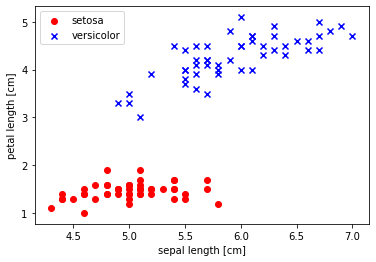

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

The preceding scatterplot shows the distribution of flower samples in the Iris dataset along the two feature axes, petal length and sepal length. In this two-dimensional feature subspace, we can see that a linear decision boundary should be sufficient to separate Setosa from Versicolor flowers. Thus, a linear classifier such as the perceptron should be able to classify the flowers in this dataset perfectly.

Now, it's time to train our perceptron algorithm on the Iris data subset that we just extracted. Also, we will plot the misclassification error for each epoch to check whether the algorithm converged and found a decision boundary that separates the two Iris flower classes:

In [3]:
import os
os.chdir('Documents/repos/nhl_draft')

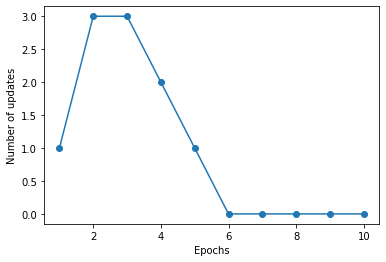

In [4]:
from src.classifiers import Perceptron

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), 
         ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

As we can see in the preceding plot, our perceptron converged after the sixth epoch and should now be able to classify the training samples perfectly.

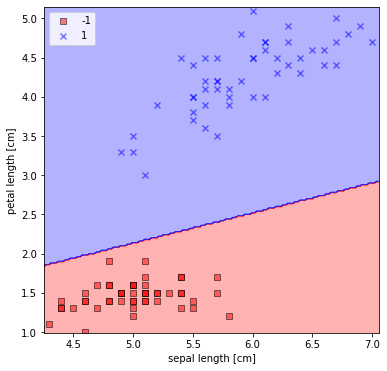

In [5]:
from src.plot_utils import plot_decision_regions

plot_decision_regions(X, y, classifier=ppn,
                      xlabel='sepal length [cm]',
                      ylabel='petal length [cm]')

## Perceptron convergence issues
Although the perceptron classified the two Iris flower classes perfectly, convergence is one of the biggest problems of the perceptron. Frank Rosenblatt proved mathematically that the perceptron learning rule converges if the two classes can be separated by a linear hyperplane. However, if classes cannot be separated perfectly by such a linear decision boundary, the weights will never stop updating unless we set a maximum number of epochs.

## OvA Technique for multi-class classification
OvA, or sometimes also called **One-versus-Rest (OvR)**, is a technique that allows us to extend a binary classifier to multi-class problems. Using OvA, we can train one classifier per class, where the particular class is treated as the positive class and the samples from all other classes are considered negative classes. If we were to classify a new data sample, we would use our n classifiers, where n is the number of class labels, and assign the class label with the highest confidence to the particular sample. In the case of the perceptron, we would use OvA to choose the class label that is associated with the largest absolute net input value.
